/var/folders/cj/rp40gtj13gj_m47t9g0by2b80000gn/T/ipykernel_19483/160553477.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(parts[0])


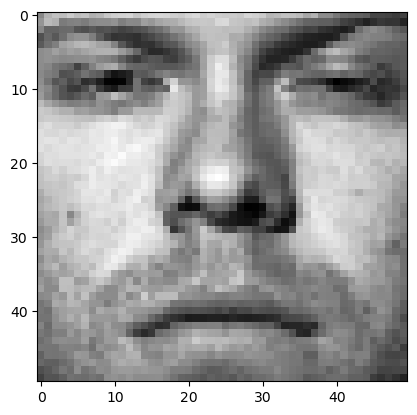

In [8]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

train_labels, train_data = [], []

with open('./faces/train.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        im = imageio.imread(parts[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(int(parts[1]))

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

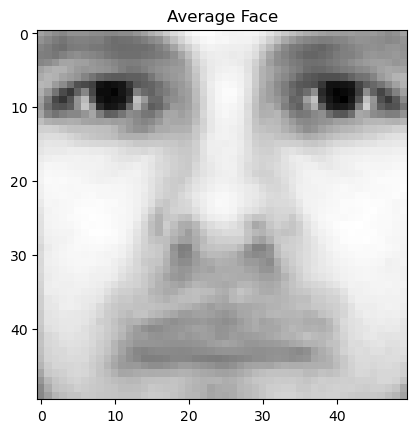

In [9]:
average_face = np.mean(train_data, axis=0)

plt.imshow(average_face.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Average Face")
plt.show()

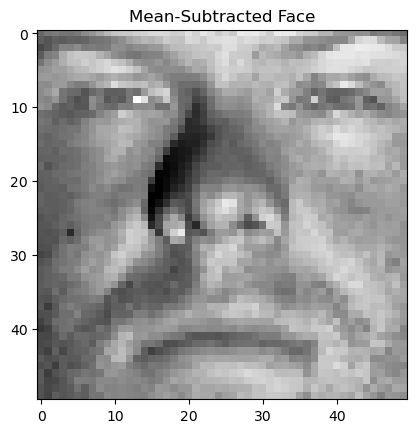

In [10]:
mean_subtracted_train_data = train_data - average_face

index = 1
mean_subtracted_train_face = mean_subtracted_train_data[index, :].reshape(50, 50)
plt.imshow(mean_subtracted_train_face, cmap=cm.Greys_r)
plt.title("Mean-Subtracted Face")
plt.show()

/var/folders/cj/rp40gtj13gj_m47t9g0by2b80000gn/T/ipykernel_19483/2401225429.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(parts[0])


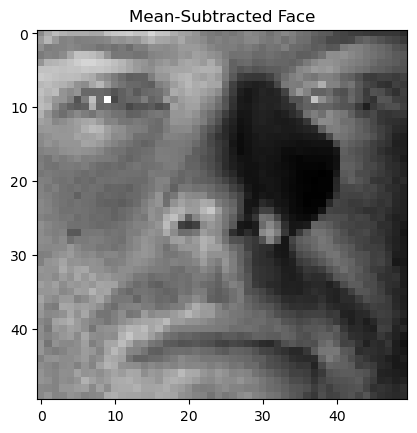

In [11]:
test_labels, test_data = [], []

with open('./faces/test.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        im = imageio.imread(parts[0])
        test_data.append(im.reshape(2500,))
        test_labels.append(int(parts[1]))

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)


mean_subtracted_test_data = test_data - average_face


index = 1
mean_subtracted_test_face = mean_subtracted_test_data[index, :].reshape(50, 50)
plt.imshow(mean_subtracted_test_face, cmap=cm.Greys_r)
plt.title("Mean-Subtracted Face")
plt.show()

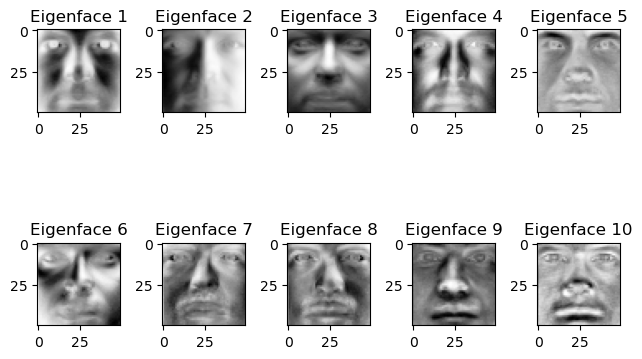

In [12]:
covariance_matrix_train = np.cov(mean_subtracted_train_data, rowvar=False)
eigenvalues_train, eigenvectors_train = np.linalg.eigh(covariance_matrix)


sorted_indices = np.argsort(eigenvalues_train)[::-1]
eigenvectors_train = eigenvectors_train[:, sorted_indices]

num_eigenfaces_to_display = 10
for i in range(num_eigenfaces_to_display):
    eigenface = eigenvectors_train[:, i].reshape(50, 50)
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap=cm.Greys_r)
    plt.title(f"Eigenface {i + 1}")

plt.tight_layout()
plt.show()

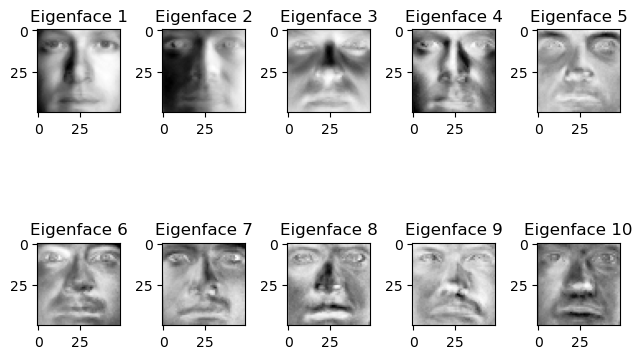

In [17]:
covariance_matrix_test = np.cov(mean_subtracted_test_data, rowvar=False)
eigenvalues_test, eigenvectors_test = np.linalg.eigh(covariance_matrix_test)


sorted_indices = np.argsort(eigenvalues_test)[::-1]
eigenvectors_test = eigenvectors_test[:, sorted_indices]

num_eigenfaces_to_display = 10
for i in range(num_eigenfaces_to_display):
    eigenface = eigenvectors_test[:, i].reshape(50, 50)
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap=cm.Greys_r)
    plt.title(f"Eigenface {i + 1}")

plt.tight_layout()
plt.show()

In [78]:
def generate_feature_matrix(X, V, r):
    Vr = V.T[:r, :]
    F = np.dot(X, Vr.T)
    return F

def generate_feature_matrix_test(Xtest, V, r):
    Vr = V.T[:r, :]
    Ftest = np.dot(Xtest, Vr.T)
    return Ftest

r = 10
F = generate_feature_matrix(mean_subtracted_train_data, eigenvectors, r)
Ftest = generate_feature_matrix_test(mean_subtracted_test_data, eigenvectors, r)

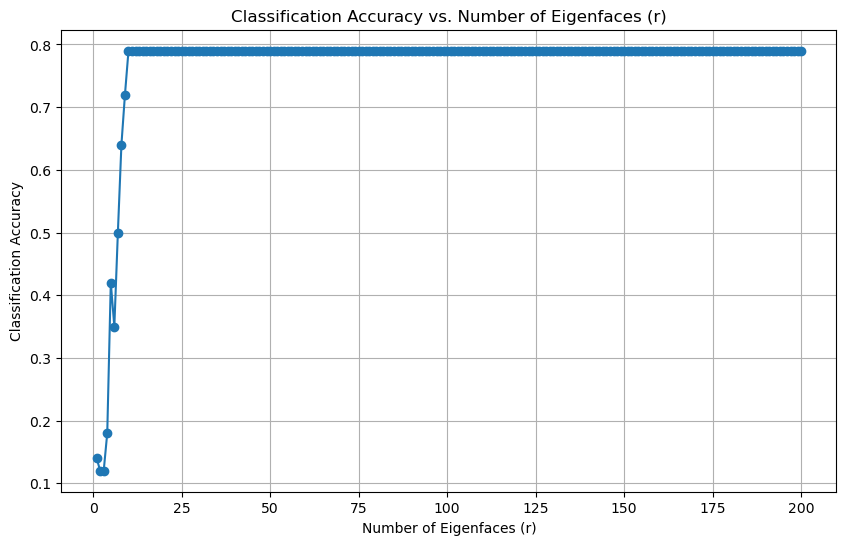

Classification Accuracy for r=10: 0.79


In [79]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

r_values = list(range(1, 201))  # r values from 1 to 200

accuracies = []

for r in r_values:
    F_r = F[:, :r]
    Ftest_r = Ftest[:, :r]

    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    model.fit(F_r, train_labels)

    y_pred = model.predict(Ftest_r)

    accuracy = accuracy_score(test_labels, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(r_values, accuracies, marker='o')
plt.title("Classification Accuracy vs. Number of Eigenfaces (r)")
plt.xlabel("Number of Eigenfaces (r)")
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.show()

chosen_r = 10
chosen_accuracy = accuracies[r_values.index(chosen_r)]
print(f"Classification Accuracy for r={chosen_r}: {chosen_accuracy}")


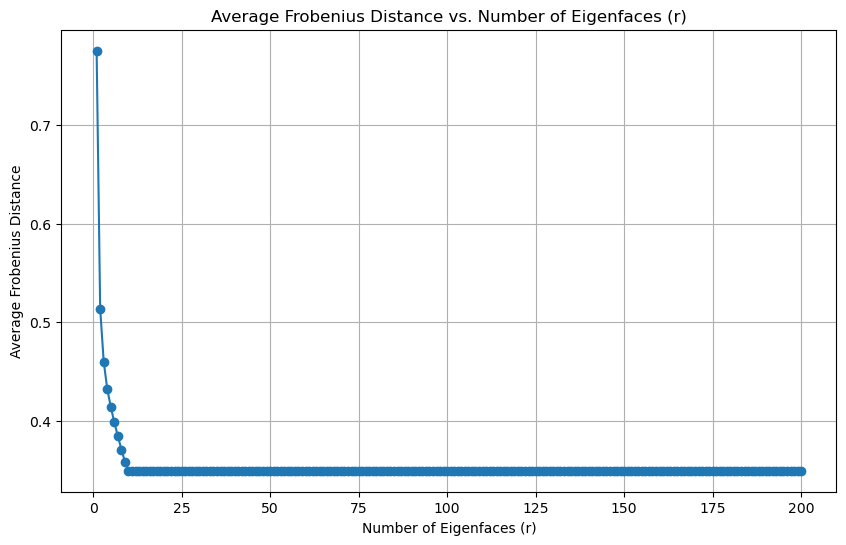

In [80]:
import numpy as np
import matplotlib.pyplot as plt

frobenius_distances = []
V=eigenvectors[:,:10]
X = mean_subtracted_train_data
X_approx = np.dot(F, V.T)

for r in range(1, 201):
    F_r = F[:, :r]
    V_r = V.T[:r, :]

    X_approx_r = np.dot(F_r, V_r)

    frobenius_distance = np.linalg.norm(X - X_approx_r, 'fro') / np.linalg.norm(X, 'fro')
    frobenius_distances.append(frobenius_distance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), frobenius_distances, marker='o')
plt.title("Average Frobenius Distance vs. Number of Eigenfaces (r)")
plt.xlabel("Number of Eigenfaces (r)")
plt.ylabel("Average Frobenius Distance")
plt.grid(True)
plt.show()
